# Data Source Visualizations 

This notebooks contains some supporting visualizations for the experiments in this repository. 

## Imports

In [1]:
# import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl

import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")

from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import seaborn as sns
# from sklearn.preprocessing import minmax_scale

## Collect / Read Data

In [47]:
# define events 
events = {
    "hawaii_2012": {
        "year": 2012,
        "magnitude": 7.8,
        "lat": 52.788,
        "lon": -132.101,
        "url": "https://earthquake.usgs.gov/earthquakes/eventpage/usp000juhz/executive"
    },
    "chile_2015": {
        "year": 2015,
        "magnitude": 8.3,
        "lat": -31.573,
        "lon": -71.674,
        "url": "https://earthquake.usgs.gov/earthquakes/eventpage/us20003k7a/executive"
    },
    "japan_2011": {
        "year": 2011,
        "magnitude": 9.1,
        "lat": 38.297,
        "lon": 142.373,
        "url": "https://earthquake.usgs.gov/earthquakes/eventpage/official20110311054624120_30/dyfi/intensity"
    },
    "chile_2014": {
        "year": 2014,
        "magnitude": 8.2,
        "lat": -19.160,
        "lon": -70.769,
        "url": "https://earthquake.usgs.gov/earthquakes/eventpage/usc000nzvd/executive"
    },
    "alaska_2020": {
        "year": 2020,
        "magnitude": 6.1,
        "lat": 54.791,
        "lon": -161.204,
        "url": "https://earthquake.usgs.gov/earthquakes/eventpage/us6000b56k/executive"
    },
    "banyaks_2010": {
        "year": 2010,
        "magnitude": 7.8,
        "lat": 2.38,
        "lon": 97.05,
        "url": "https://en.wikipedia.org/wiki/April_2010_Sumatra_earthquake"
    },
    "mentawai_2010": {
        "year": 2012,
        "magnitude": 7.8,
        "lat": 3.487,
        "lon": 100.082,
        "url": "https://earthquake.usgs.gov/earthquakes/eventpage/usp000hnj4/executive"
    },
    "fiordland_2009": {
        "year": 2012,
        "magnitude": 7.8,
        "lat": -45.721,
        "lon": 166.643,
        "url": "https://en.wikipedia.org/wiki/2009_Fiordland_earthquake"
    },
    "maule_2010": {
        "year": 2010,
        "magnitude": 8.8,
        "lat": -36.112,
        "lon": -72.898,
        "url": "https://earthquake.usgs.gov/earthquakes/eventpage/official20100227063411530_30/executive"
    }
}

In [48]:
len(events)

9

In [49]:
events_df = pd.DataFrame.from_dict(events).T
events_df

,year,magnitude,lat,lon,url
hawaii_2012,2012,7.8,52.788,-132.101,https://earthquake.usgs.gov/earthquakes/eventp...
chile_2015,2015,8.3,-31.573,-71.674,https://earthquake.usgs.gov/earthquakes/eventp...
japan_2011,2011,9.1,38.297,142.373,https://earthquake.usgs.gov/earthquakes/eventp...
chile_2014,2014,8.2,-19.16,-70.769,https://earthquake.usgs.gov/earthquakes/eventp...
alaska_2020,2020,6.1,54.791,-161.204,https://earthquake.usgs.gov/earthquakes/eventp...
banyaks_2010,2010,7.8,2.38,97.05,https://en.wikipedia.org/wiki/April_2010_Sumat...
mentawai_2010,2012,7.8,3.487,100.082,https://earthquake.usgs.gov/earthquakes/eventp...
fiordland_2009,2012,7.8,-45.721,166.643,https://en.wikipedia.org/wiki/2009_Fiordland_e...
maule_2010,2010,8.8,-36.112,-72.898,https://earthquake.usgs.gov/earthquakes/eventp...


## Plotting

/home/vconstan/.conda/envs/tidd/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


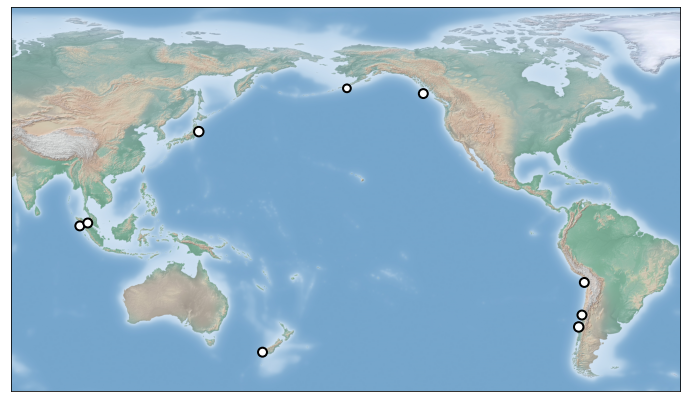

In [53]:
# set the figure size 
f, ax = plt.subplots(figsize=(12, 12))

# first draw the geographic map 
ax = Basemap(projection='merc', 
             llcrnrlat=-60.623, 
             urcrnrlat=85.715,
             llcrnrlon=70.722,
             urcrnrlon=325.793,
             resolution='h', 
             epsg=4326
) 
# ax.shadedrelief()
# ax.drawcountries(color='gray')
# ax.drawstates(color='gray')
# ax.fillcontinents()
# ax.fillcontinents(color='gray', ocean_color='white')
# ax.bluemarble()
ax.shadedrelief()
# ax.etopo()
# draw_arcgisimage(ax, "ESRI_Imagery_World_2D", 1500)
# ax.arcgisimage(
#     server="http://server.arcgisonline.com/ArcGIS",
#     service="ESRI_Imagery_World_2D", xpixels=2000, verbose=True, dpi=500
# )
    
# ax.arcgisimage(service='ESRI_Imagery_World_2D', xpixels=2000, verbose=False)

# ax.drawcoastlines(color='gray')

# then add the scatterplot on top 
ax.scatter(
    events_df["lon"].values, 
    events_df["lat"].values, 
    latlon=True,
    c="white",
    s=[round(x)*10 for x in events_df["magnitude"].values], 
    edgecolors='black',
    linewidths=2,
#     cmap="RdYlBu",
#     vmin=-0.004, vmax=0.004,
#     s=250,
    alpha=1
)

plt.show()